In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import animation, rc
rc('animation', html='jshtml')
import folium
from folium import plugins
from folium.features import PolyLine
from dash import dcc, html, Dash
from dash.dependencies import Input, Output

In [3]:
data=pd.read_excel('Data.xlsx')
display(data[0:3])
print(data.columns.tolist())
print(len(data))

,Sr. no.,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,start_latlng,end_latlng,sport_type,start_date,timezone,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed
0,1,2023-12-09T09:09:19Z,Run,10879.7,4023,4617,91.4,"[40.70327935740352, -73.99619171395898]","[40.69340907968581, -73.97922154515982]",Run,2023-12-09T14:09:19Z,(GMT-05:00) America/New_York,4,4,0,3,0,2.704,6.228
1,2,2023-12-07T17:31:50Z,Run,1304.4,722,62993,0.0,"[40.7220459356904, -74.03641730546951]","[40.719722136855125, -74.03257705271244]",Run,2023-12-07T22:31:50Z,(GMT-05:00) America/New_York,0,0,0,1,0,1.807,4.044
2,3,2023-12-03T09:18:13Z,Run,17503.0,7370,7462,68.4,"[40.74991073459387, -73.98751585744321]","[40.73538766242564, -73.9793517999351]",Run,2023-12-03T14:18:13Z,(GMT-05:00) America/New_York,2,5,0,4,0,2.375,6.778


['Sr. no.', 'start_date_local', 'type', 'distance', 'moving_time', 'elapsed_time', 'total_elevation_gain', 'start_latlng', 'end_latlng', 'sport_type', 'start_date', 'timezone', 'achievement_count', 'kudos_count', 'comment_count', 'athlete_count', 'photo_count', 'average_speed', 'max_speed']
105


In [4]:
display(data.info())
data['start_date_local']=pd.to_datetime(data['start_date_local'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sr. no.               105 non-null    int64  
 1   start_date_local      105 non-null    object 
 2   type                  105 non-null    object 
 3   distance              105 non-null    float64
 4   moving_time           105 non-null    int64  
 5   elapsed_time          105 non-null    int64  
 6   total_elevation_gain  105 non-null    float64
 7   start_latlng          105 non-null    object 
 8   end_latlng            105 non-null    object 
 9   sport_type            105 non-null    object 
 10  start_date            105 non-null    object 
 11  timezone              105 non-null    object 
 12  achievement_count     105 non-null    int64  
 13  kudos_count           105 non-null    int64  
 14  comment_count         105 non-null    int64  
 15  athlete_count         1

None

In [5]:
data=data[data['start_latlng']!='[]'].reset_index(drop=True)
display(data)

,Sr. no.,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,start_latlng,end_latlng,sport_type,start_date,timezone,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed
0,1,2023-12-09 09:09:19+00:00,Run,10879.7,4023,4617,91.4,"[40.70327935740352, -73.99619171395898]","[40.69340907968581, -73.97922154515982]",Run,2023-12-09T14:09:19Z,(GMT-05:00) America/New_York,4,4,0,3,0,2.704,6.228
1,2,2023-12-07 17:31:50+00:00,Run,1304.4,722,62993,0.0,"[40.7220459356904, -74.03641730546951]","[40.719722136855125, -74.03257705271244]",Run,2023-12-07T22:31:50Z,(GMT-05:00) America/New_York,0,0,0,1,0,1.807,4.044
2,3,2023-12-03 09:18:13+00:00,Run,17503.0,7370,7462,68.4,"[40.74991073459387, -73.98751585744321]","[40.73538766242564, -73.9793517999351]",Run,2023-12-03T14:18:13Z,(GMT-05:00) America/New_York,2,5,0,4,0,2.375,6.778
3,4,2023-12-02 09:41:14+00:00,Run,3457.8,1791,2170,3.9,"[40.72203076444566, -74.03641068376601]","[40.71398631669581, -74.03902692720294]",Run,2023-12-02T14:41:14Z,(GMT-05:00) America/New_York,0,2,0,3,0,1.931,4.522
4,5,2023-12-01 17:06:05+00:00,Run,10108.2,4128,4221,6.3,"[40.72190687991679, -74.03624514117837]","[40.71669920347631, -74.03264125809073]",Run,2023-12-01T22:06:05Z,(GMT-05:00) America/New_York,4,5,0,1,0,2.449,5.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,101,2022-06-12 09:20:44+00:00,Run,7857.2,3900,4113,116.6,"[39.27252494730055, -76.69631998054683]","[39.27245143800974, -76.69639013707638]",Run,2022-06-12T13:20:44Z,(GMT-05:00) America/New_York,6,0,0,1,0,2.015,3.326
92,102,2022-05-28 11:11:38+00:00,Run,6067.2,3334,3555,88.2,"[39.272494772449136, -76.69640866108239]","[39.27246367558837, -76.69636884704232]",Run,2022-05-28T15:11:38Z,(GMT-05:00) America/New_York,3,0,0,1,0,1.820,3.172
93,103,2022-05-22 07:13:30+00:00,Run,4587.6,2263,2478,56.6,"[39.272621758282185, -76.69633297249675]","[39.27250734530389, -76.69635468162596]",Run,2022-05-22T11:13:30Z,(GMT-05:00) America/New_York,5,0,0,1,0,2.027,3.557
94,104,2022-05-21 07:27:40+00:00,Run,4313.6,2182,2426,55.0,"[39.27257808856666, -76.69626507908106]","[39.27250818349421, -76.69635669328272]",Run,2022-05-21T11:27:40Z,(GMT-05:00) America/New_York,4,0,0,1,0,1.977,3.874


In [6]:
print(data.columns.tolist())
cols=['sport_type','distance', 'moving_time', 'elapsed_time', 'total_elevation_gain',  'average_speed', 'max_speed']

['Sr. no.', 'start_date_local', 'type', 'distance', 'moving_time', 'elapsed_time', 'total_elevation_gain', 'start_latlng', 'end_latlng', 'sport_type', 'start_date', 'timezone', 'achievement_count', 'kudos_count', 'comment_count', 'athlete_count', 'photo_count', 'average_speed', 'max_speed']


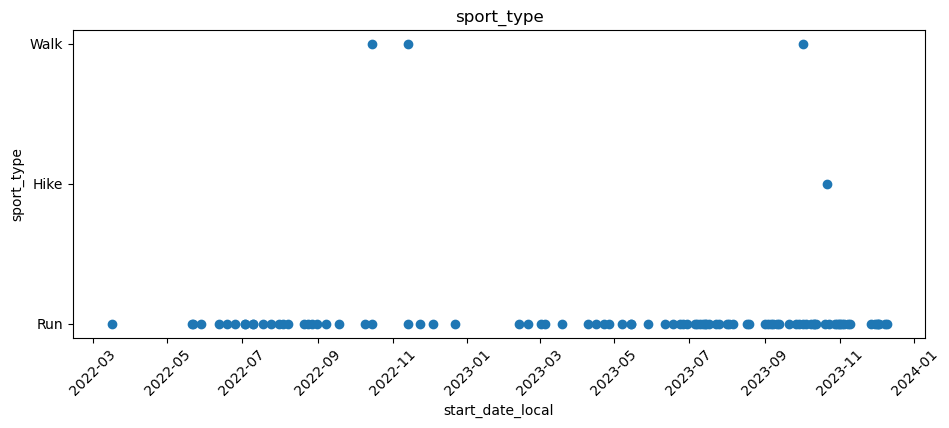

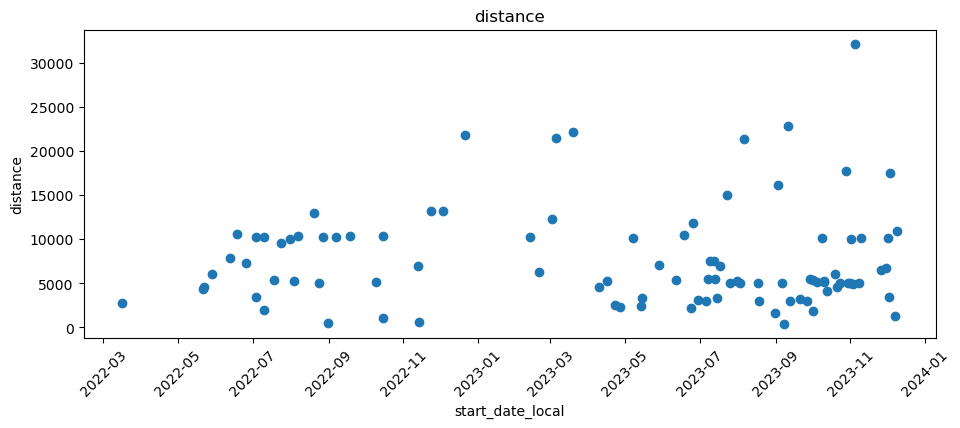

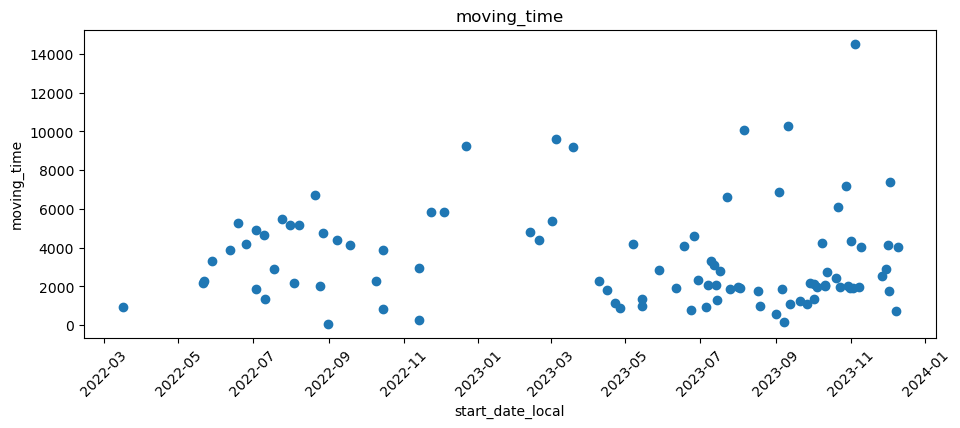

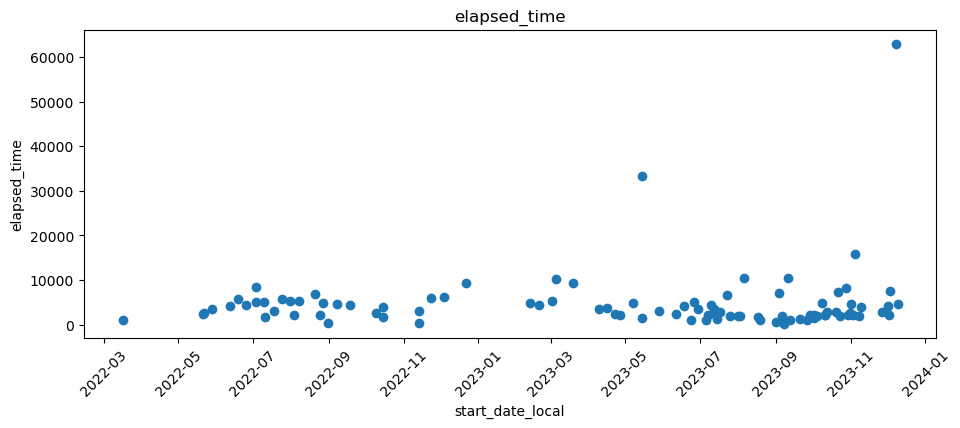

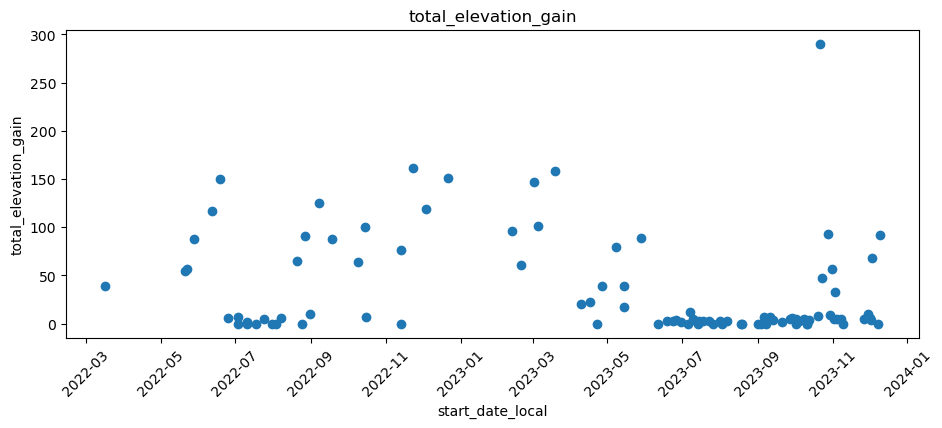

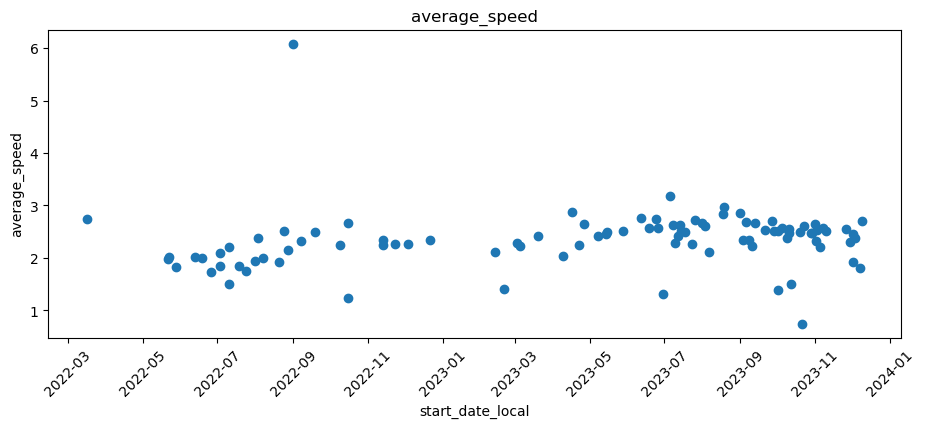

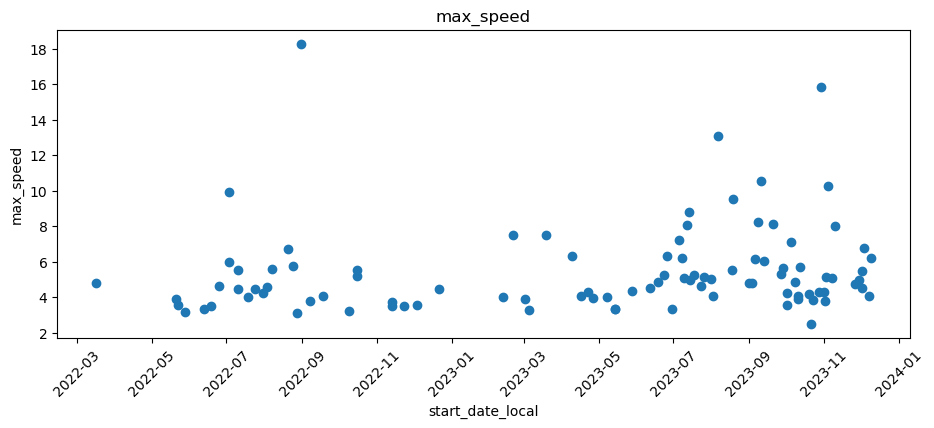

In [7]:
for col in cols:
    plt.figure(figsize=(11,4))
    plt.scatter(data['start_date_local'], data[col])
    plt.xlabel('start_date_local')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

In [8]:
def coord(coord_str):
    coords = [float(coord) for coord in coord_str.strip('[]').split(', ')]
    return coords

coord(data.loc[0,'start_latlng'])

[40.70327935740352, -73.99619171395898]

In [12]:


#convertir la colonne start_date_local en format datetime
data['start_date_local'] = pd.to_datetime(data['start_date_local'])

#filtrer les données pour supprimer les lignes sans coordonnées
data = data[data['start_latlng'] != '[]'].reset_index(drop=True)

#convertir la chaîne de coordonnées en une liste de coordonnées
def coord(coord_str):
    coords = [float(coord) for coord in coord_str.strip('[]').split(', ')]
    return coords

#carte avec les 30 premières lignes de données
map_fig = folium.Map(location=[40.74, -74], tiles='OpenStreetMap', zoom_start=13.0, min_zoom=2.0)
for i in range(30):
    folium.Marker(location=coord(data.loc[i, 'start_latlng']), icon=folium.Icon(color='green')).add_to(map_fig)  # Point de départ
    folium.Marker(location=coord(data.loc[i, 'end_latlng']), icon=folium.Icon(color='red')).add_to(map_fig)  # Point d'arrivée
    points = [coord(data.loc[i, 'start_latlng']), coord(data.loc[i, 'end_latlng'])]
    folium.PolyLine(locations=points, color="black", weight=3).add_to(map_fig)
    folium.PolyLine(locations=[points[0], points[1]], color="red", weight=3).add_to(map_fig)

#graphiques interactifs avec Dash
app = Dash(__name__)

app.layout = html.Div([
    html.Div([
        html.Div([
            dcc.Graph(
                id='scatter-plot',
                figure=px.scatter(data, x='start_date_local', y='distance', color='sport_type', title='Distance over Time by Sport Type')
            ),
            dcc.Graph(
                id='bar-chart',
                figure=px.bar(data, x='sport_type', y='distance', title='Total Distance by Sport Type')
            )
        ], className='six columns'),

        html.Div([
            dcc.Graph(
                id='pie-chart',
                figure=px.pie(data, names='sport_type', title='Distribution of Activities by Sport Type')
            ),
            dcc.Graph(
                id='line-chart',
                figure=px.line(data, x='start_date_local', y='total_elevation_gain', color='sport_type', title='Elevation Gain over Time by Sport Type')
            )
        ], className='six columns')
    ], className='row'),

    html.Div([
        html.Iframe(id='map', srcDoc=map_fig._repr_html_(), width='100%', height='600')
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)
